In [88]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [89]:
df = pd.read_csv("tennis_stats.csv")

In [90]:
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [91]:
print(df.Player.nunique())
print(len(df))

438
1721


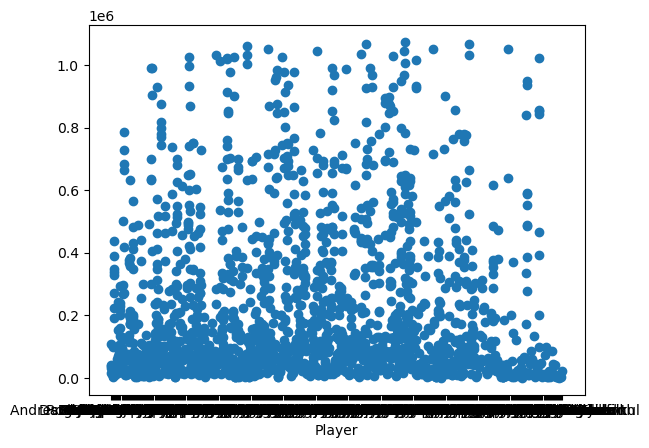

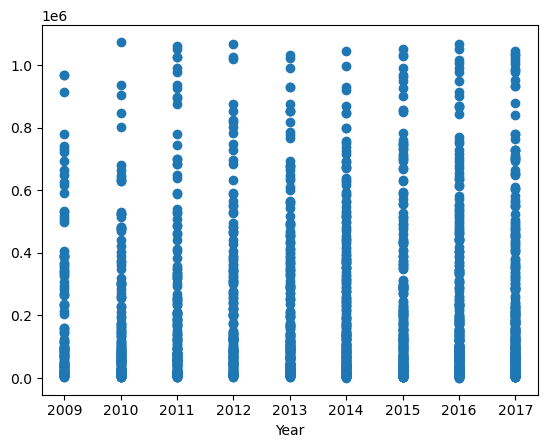

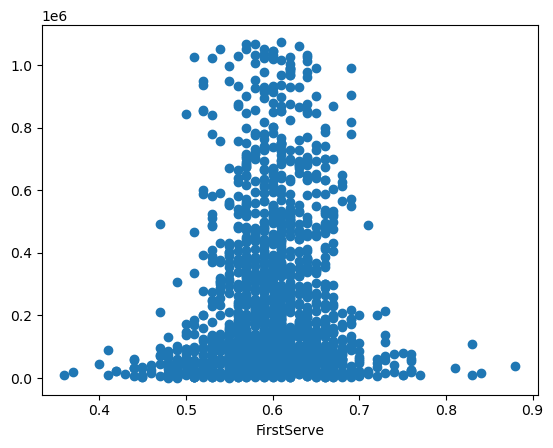

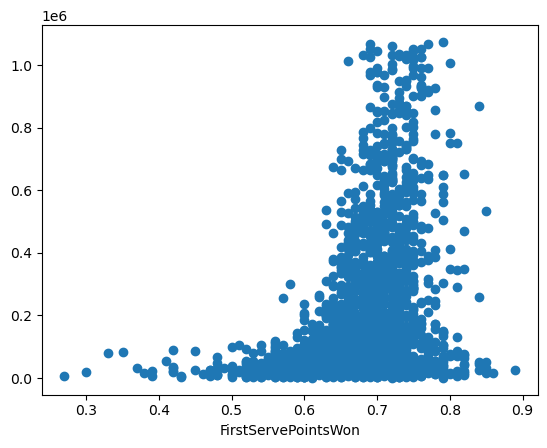

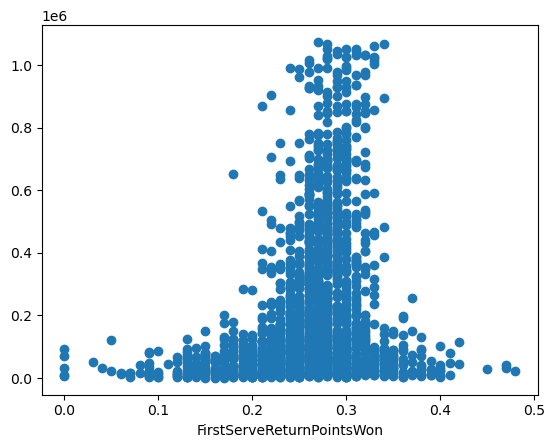

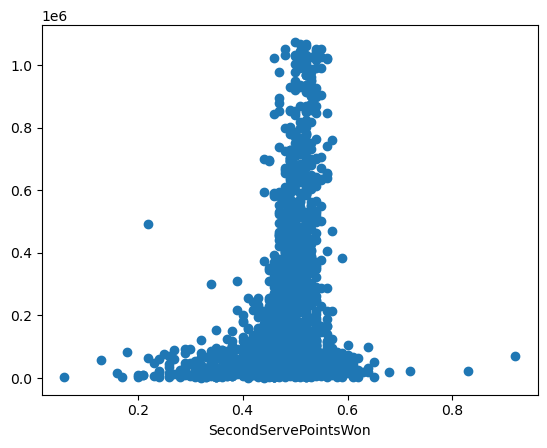

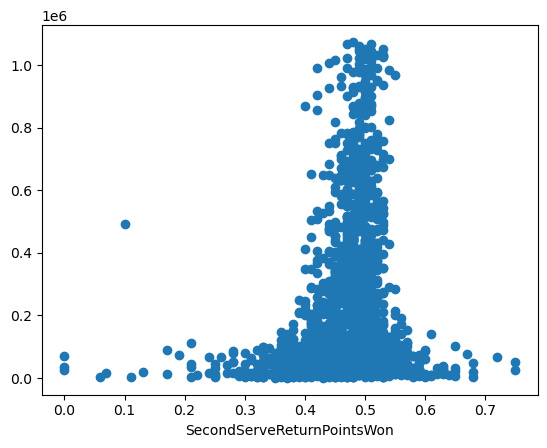

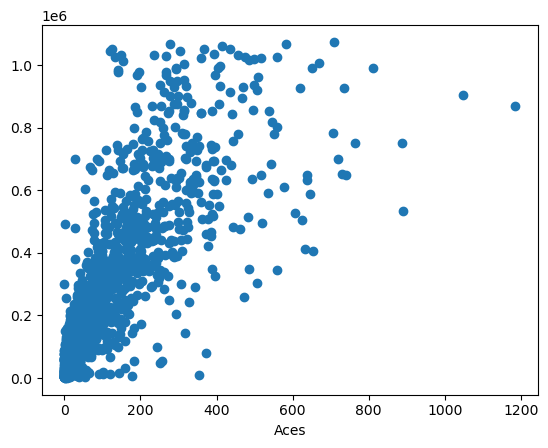

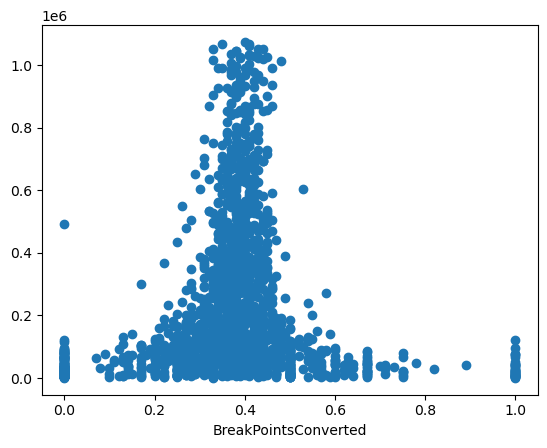

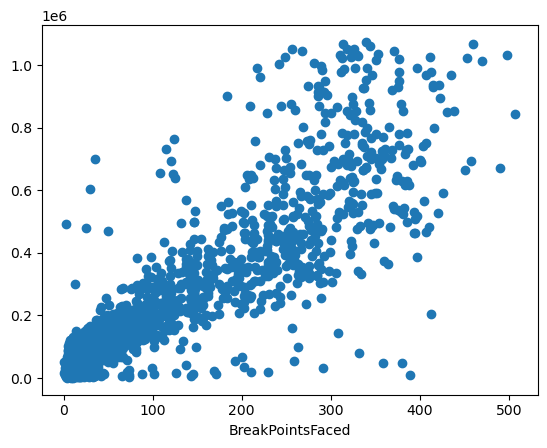

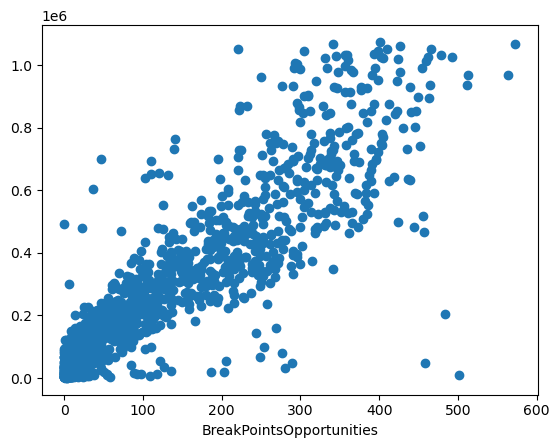

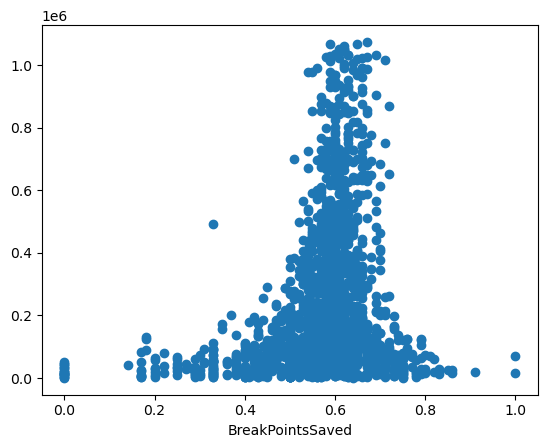

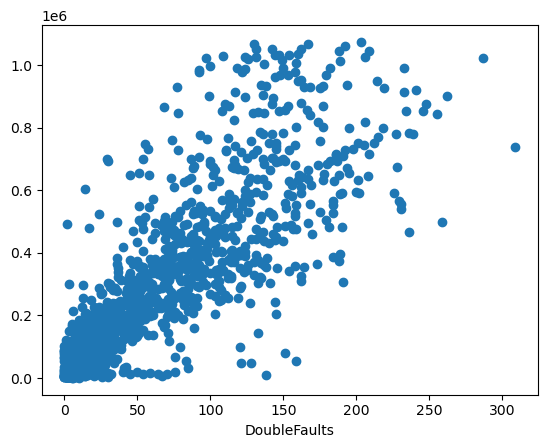

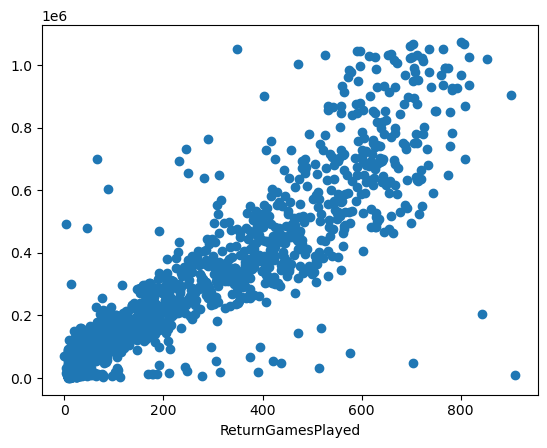

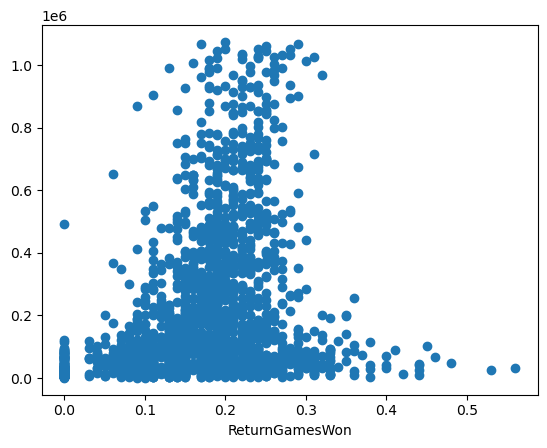

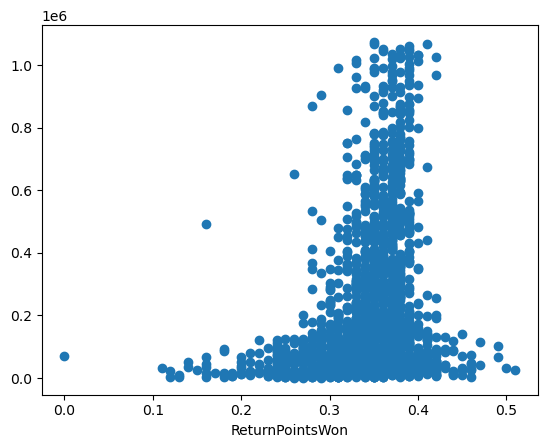

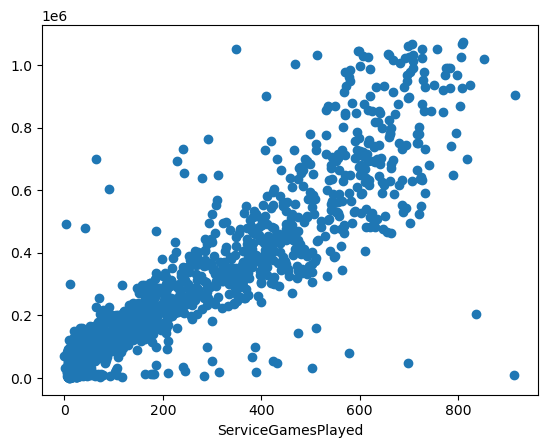

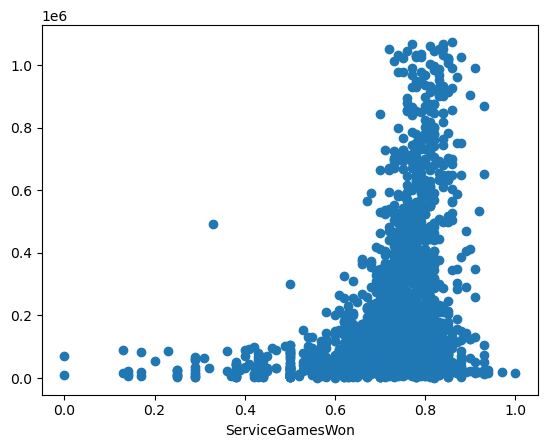

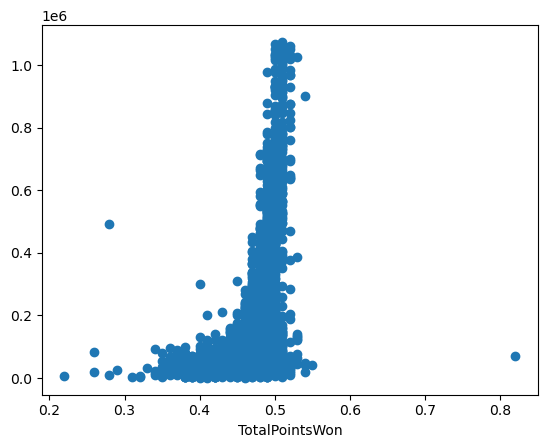

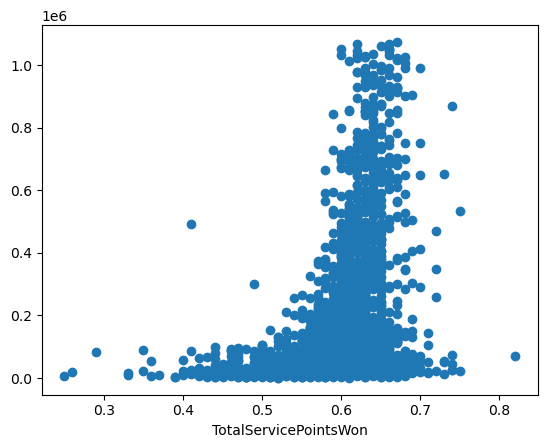

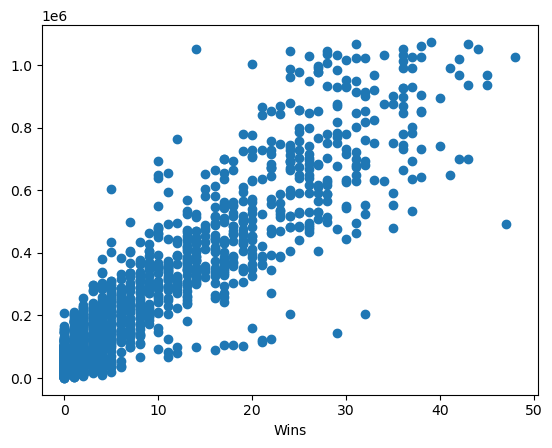

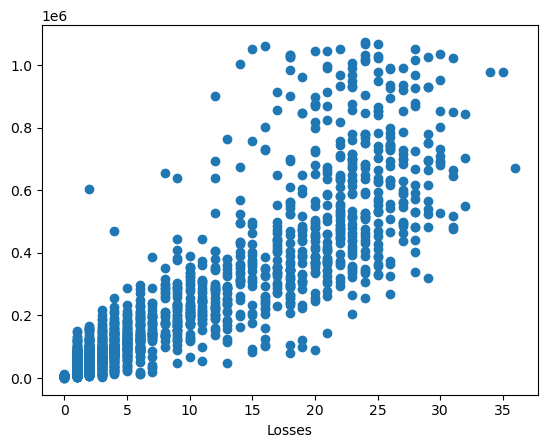

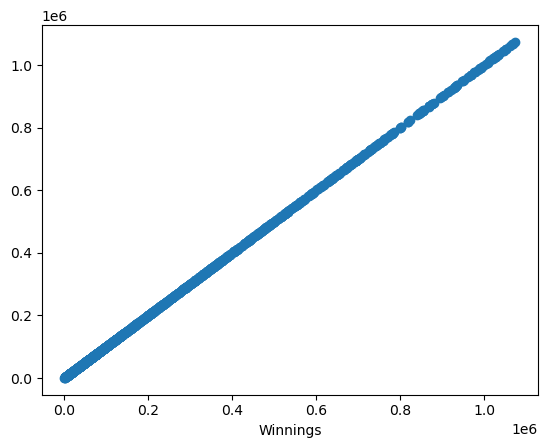

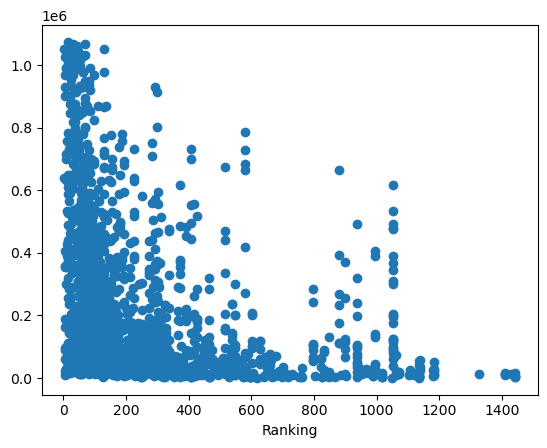

<Figure size 640x480 with 0 Axes>

In [92]:
for i in df.columns:
    plt.scatter(df[i],df.Winnings)
    plt.xlabel(i)
    plt.show()
    plt.clf()

In [93]:
regl = LinearRegression()
X = df[["ServiceGamesPlayed"]]
y = df[["Winnings"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.8,test_size=0.2)
regl.fit(X_train,y_train)
print("coeficients :" ,regl.coef_[0][0])
print("İntercept :",regl.intercept_[0])
print("Accuracy :",regl.score(X_train,y_train))

coeficients : 1031.3146237870335
İntercept : 29249.95242613484
Accuracy : 0.8228539359989078


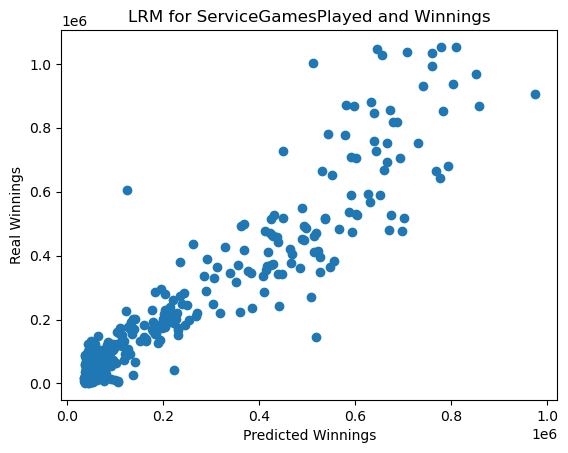

<Figure size 640x480 with 0 Axes>

In [94]:
y_predicted = regl.predict(X_test)
plt.scatter(y_predicted,y_test)
plt.xlabel("Predicted Winnings")
plt.ylabel("Real Winnings")
plt.title("LRM for ServiceGamesPlayed and Winnings")
plt.show()
plt.clf()

In [95]:
lm = LinearRegression()
X1 = df[['BreakPointsOpportunities']]
y1 = df[["Winnings"]]
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,train_size =0.8,test_size=0.2)
lm.fit(X_train1,y_train1)
print("coeficients :" ,lm.coef_[0][0])
print("İntercept :",lm.intercept_[0])
print("Accuracy :",lm.score(X_train1,y_train1))

coeficients : 1035.6149475158113
İntercept : 27675.00064147488
Accuracy : 0.8270942198914064


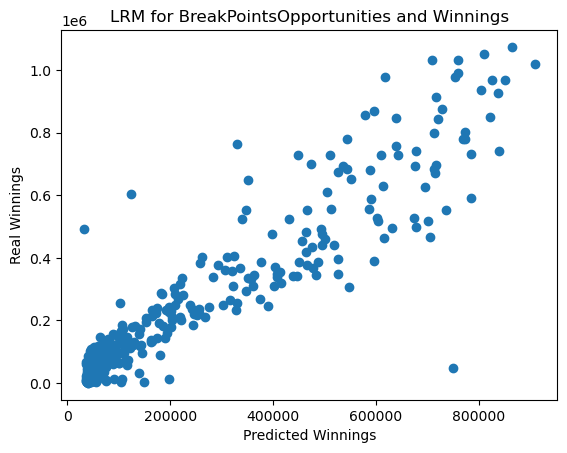

<Figure size 640x480 with 0 Axes>

In [96]:
y_predicted1 = regl.predict(X_test1)
plt.scatter(y_predicted1,y_test1)
plt.xlabel("Predicted Winnings")
plt.ylabel("Real Winnings")
plt.title("LRM for BreakPointsOpportunities and Winnings")
plt.show()
plt.clf()

In [97]:
features = df[['BreakPointsOpportunities',"FirstServeReturnPointsWon"]]
outcome = df[["Winnings"]]
X_train2,X_test2,y_train2,y_test2 = train_test_split(features,outcome,train_size =0.8,test_size=0.2)
lrm = LinearRegression()
lrm.fit(X_train2,y_train2)
print("coeficients :" ,lrm.coef_)
print("İntercept :",lrm.intercept_[0])
print("Accuracy :",lrm.score(X_train2,y_train2))

coeficients : [[   1889.71587559 -215812.07421648]]
İntercept : 97475.44081479122
Accuracy : 0.8036401473493062


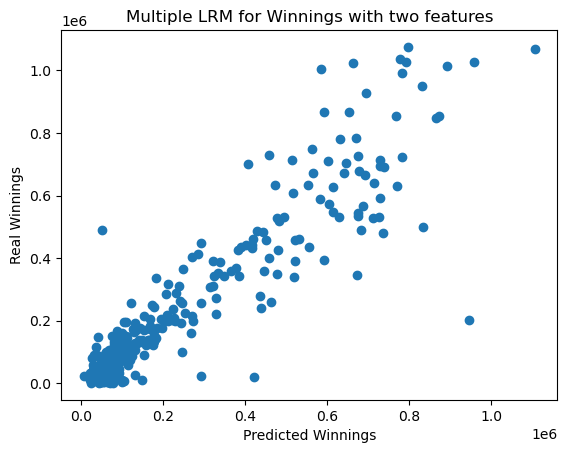

<Figure size 640x480 with 0 Axes>

In [98]:
y_predicted2 = lrm.predict(X_test2)
plt.scatter(y_predicted2,y_test2)
plt.xlabel("Predicted Winnings")
plt.ylabel("Real Winnings")
plt.title("Multiple LRM for Winnings with two features")
plt.show()
plt.clf()

In [99]:
features1 = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome1 = df[['Winnings']]
X_train3,X_test3,y_train3,y_test3 = train_test_split(features1,outcome1,train_size =0.8,test_size=0.2)
linear = LinearRegression()
linear.fit(X_train3,y_train3)
print("coeficients :" ,linear.coef_)
print("İntercept :",linear.intercept_[0])
print("Accuracy :",linear.score(X_train3,y_train3))

coeficients : [[ 3.83982024e+04  1.65636861e+05 -3.87025326e+04  1.15826472e+05
   6.82809430e+03  1.46282678e+00 -1.12252272e+03 -7.17481534e+02
   7.50761937e+02  3.89713464e+04  4.35020107e+02  2.48240999e+02
   1.05595854e+05  1.46271633e+04  6.54476875e+02  3.00728831e+04
  -3.64153253e+05 -1.67820989e+05]]
İntercept : 59886.8909012817
Accuracy : 0.8459491571369808


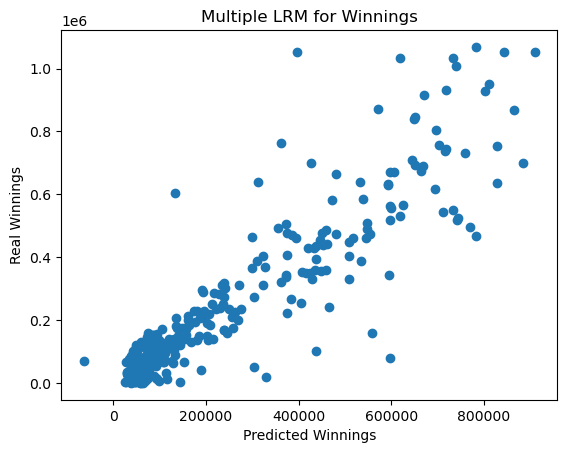

<Figure size 640x480 with 0 Axes>

In [100]:
y_predicted3 = linear.predict(X_test3)
plt.scatter(y_predicted3,y_test3)
plt.xlabel("Predicted Winnings")
plt.ylabel("Real Winnings")
plt.title("Multiple LRM for Winnings")
plt.show()
plt.clf()